Data Understanding 

In [700]:
# data handling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import IFrame

# modeling and analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [701]:
# notebook setup and config
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format

In [702]:
my_data = pd.read_csv('AccidentLondonBoroughs2223.csv')


In [703]:
my_data.shape
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145222 entries, 0 to 145221
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               145222 non-null  object 
 1   Location_Easting_OSGR                        145222 non-null  int64  
 2   Location_Northing_OSGR                       145222 non-null  int64  
 3   Longitude                                    145222 non-null  float64
 4   Latitude                                     145222 non-null  float64
 5   Police_Force                                 145222 non-null  int64  
 6   Accident_Severity                            145222 non-null  int64  
 7   Number_of_Vehicles                           145222 non-null  int64  
 8   Number_of_Casualties                         145222 non-null  int64  
 9   Date                                         145222 non-nul

In [704]:
my_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680,178240,-0.19,51.49,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170,181650,-0.21,51.52,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520,182240,-0.21,51.53,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900,177530,-0.17,51.48,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060,179040,-0.16,51.50,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


In [705]:
# Basic statistics for each numeric attribute
print("\nBasic Statistics for Numeric Columns:")
print(my_data.describe())

# Calculate skewness, kurtosis, and mode
print("\nSkewness and Kurtosis:")
for column in my_data.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{column} - Skewness: {my_data[column].skew():.2f}, Kurtosis: {my_data[column].kurt():.2f}, Mode: {my_data[column].mode()[0]}")


Basic Statistics for Numeric Columns:
       Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
count              145222.00               145222.00  145222.00 145222.00   
mean               530519.82               180487.68      -0.12     51.51   
std                 10110.80                 7677.33       0.15      0.07   
min                503590.00               156110.00      -0.51     51.29   
25%                524660.00               175690.00      -0.21     51.46   
50%                530860.00               181000.00      -0.12     51.51   
75%                536620.00               185800.00      -0.03     51.56   
max                561130.00               200910.00       0.32     51.69   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
count     145222.00          145222.00           145222.00   
mean           1.64               2.86                1.79   
std            5.45               0.37                0.64   
min            1.00

In [706]:
print(my_data.isnull().sum())

Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junction_Control               

In [707]:
# Explore basic statistics of each attribute
statistics_summary = {}

# Loop through each column to calculate statistics
for column in my_data.columns:
    if my_data[column].dtype in ['int64', 'float64']:  # For numeric columns
        statistics_summary[column] = {
            'Min': my_data[column].min(),
            'Max': my_data[column].max(),
            'Mean': my_data[column].mean(),
            'StdDev': my_data[column].std(),
            'Skewness': my_data[column].skew(),
            'Kurtosis': my_data[column].kurt(),
            'Mode': my_data[column].mode()[0] if not my_data[column].mode().empty else None
        }
    elif my_data[column].dtype == 'category' or my_data[column].dtype == 'object':  # For categorical columns
        statistics_summary[column] = {
            'Unique Values': my_data[column].nunique(),
            'Most Frequent': my_data[column].mode()[0] if not my_data[column].mode().empty else None,
            'Frequency': my_data[column].value_counts().max()
        }

# Convert the statistics into a DataFrame for better visualization
statistics_df = pd.DataFrame(statistics_summary).T

# Display the statistics summary
statistics_df

,Unique Values,Most Frequent,Frequency,Min,Max,Mean,StdDev,Skewness,Kurtosis,Mode
Accident_Index,145222,200501BS00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Easting_OSGR,NaN,NaN,NaN,503590.00,561130.00,530519.82,10110.80,-0.05,-0.05,533650.00
Location_Northing_OSGR,NaN,NaN,NaN,156110.00,200910.00,180487.68,7677.33,-0.25,-0.20,181310.00
Longitude,NaN,NaN,NaN,-0.51,0.32,-0.12,0.15,-0.04,-0.04,-0.08
Latitude,NaN,NaN,NaN,51.29,51.69,51.51,0.07,-0.26,-0.18,51.53
Police_Force,NaN,NaN,NaN,1.00,48.00,1.64,5.45,8.38,68.25,1.00
Accident_Severity,NaN,NaN,NaN,1.00,3.00,2.86,0.37,-2.50,5.56,3.00
Number_of_Vehicles,NaN,NaN,NaN,1.00,14.00,1.79,0.64,1.05,5.96,2.00
Number_of_Casualties,NaN,NaN,NaN,1.00,40.00,1.21,0.58,6.23,167.26,1.00
Date,2191,29/09/2010,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [708]:
from scipy import stats
import numpy as np

# Select numeric columns
numeric_columns = my_data.select_dtypes(include=['int64', 'float64']).columns

# Compute Z-Scores for all numeric columns
z_scores = np.abs(stats.zscore(my_data[numeric_columns]))

# Identify rows with outliers (any column with Z-score > 3)
outlier_mask = (z_scores > 3).any(axis=1)

# Count and flag outliers
outliers = my_data[outlier_mask]
non_outliers = my_data[~outlier_mask]

# Print results
print(f"Total Rows: {my_data.shape[0]}")
print(f"Number of Outlier Rows Detected: {outliers.shape[0]}")
print(f"Number of Non-Outlier Rows: {non_outliers.shape[0]}")

# Display outliers
print("\nOutlier Rows Detected:")
print(outliers)

Total Rows: 145222
Number of Outlier Rows Detected: 34303
Number of Non-Outlier Rows: 110919

Outlier Rows Detected:
       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
4       200501BS00005                 528060                  179040   
5       200501BS00006                 524770                  181160   
9       200501BS00011                 524550                  180810   
12      200501BS00015                 525590                  178520   
13      200501BS00016                 527990                  178690   
...               ...                    ...                     ...   
145213  201001ZT80431                 528720                  164530   
145214  201001ZT80432                 530450                  165900   
145216  201001ZT80434                 526000                  163390   
145217  201001ZT80435                 525680                  163130   
145219  201001ZT80444                 523860                  161100   

        Longitude 

In [709]:
# Filter dataset for Local_Authority_Highway == 'E09000001'
filtered_data = my_data[my_data['Local_Authority_Highway'] == 'E09000006']

# Display summary of the filtered data
print(filtered_data.shape)
print(filtered_data.info())
print(filtered_data.head())

(4352, 32)
<class 'pandas.core.frame.DataFrame'>
Index: 4352 entries, 11735 to 144718
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               4352 non-null   object 
 1   Location_Easting_OSGR                        4352 non-null   int64  
 2   Location_Northing_OSGR                       4352 non-null   int64  
 3   Longitude                                    4352 non-null   float64
 4   Latitude                                     4352 non-null   float64
 5   Police_Force                                 4352 non-null   int64  
 6   Accident_Severity                            4352 non-null   int64  
 7   Number_of_Vehicles                           4352 non-null   int64  
 8   Number_of_Casualties                         4352 non-null   int64  
 9   Date                                         4352 non-null   o

In [710]:
filtered_data['Local_Authority_Highway'].unique()

array(['E09000006'], dtype=object)

In [711]:
# Define column type mappings
column_type_mapping = {
    # Convert to datetime
    'Date': 'datetime',
    'Time': 'datetime',
    
    # Convert to categorical
    'Local_Authority_Highway': 'category',
    'Accident_Severity': 'category',
    'Day_of_Week': 'category',
    'Road_Type': 'category',
    'Weather_Conditions': 'category',
    'Light_Conditions': 'category',
    'Urban_or_Rural_Area': 'category',
    'Did_Police_Officer_Attend_Scene_of_Accident': 'category',
    
    # Convert to numeric
    'Number_of_Vehicles': 'int',
    'Number_of_Casualties': 'int',
    'Speed_limit': 'int',
    'Longitude': 'float',
    'Latitude': 'float',
    'Location_Easting_OSGR': 'int',
    'Location_Northing_OSGR': 'int',
    
    # Convert to string
    'Accident_Index': 'string',
    'LSOA_of_Accident_Location': 'string'
}

# Apply conversions based on the mappings
for column, dtype in column_type_mapping.items():
    if column in filtered_data.columns:
        if dtype == 'datetime':
            filtered_data[column] = pd.to_datetime(filtered_data[column], errors='coerce')
        elif dtype == 'category':
            filtered_data[column] = filtered_data[column].astype('category')
        elif dtype == 'int':
            filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce', downcast='integer')
        elif dtype == 'float':
            filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce', downcast='float')
        elif dtype == 'string':
            filtered_data[column] = filtered_data[column].astype('string')

# Verify the updated data types
print("\nUpdated Data Types:")
print(filtered_data.dtypes)


Updated Data Types:
Accident_Index                                 string[python]
Location_Easting_OSGR                                   int32
Location_Northing_OSGR                                  int32
Longitude                                             float32
Latitude                                              float32
Police_Force                                            int64
Accident_Severity                                    category
Number_of_Vehicles                                       int8
Number_of_Casualties                                     int8
Date                                           datetime64[ns]
Day_of_Week                                          category
Time                                           datetime64[ns]
Local_Authority_District                                int64
Local_Authority_Highway                              category
1st_Road_Class                                          int64
1st_Road_Number                                  

/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1292851283.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_datetime(filtered_data[column], errors='coerce')
/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1292851283.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data[column] = pd.to_datetime(filtered_data[column], errors='coerce')
/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1292851283.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [712]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4352 entries, 11735 to 144718
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               4352 non-null   string        
 1   Location_Easting_OSGR                        4352 non-null   int32         
 2   Location_Northing_OSGR                       4352 non-null   int32         
 3   Longitude                                    4352 non-null   float32       
 4   Latitude                                     4352 non-null   float32       
 5   Police_Force                                 4352 non-null   int64         
 6   Accident_Severity                            4352 non-null   category      
 7   Number_of_Vehicles                           4352 non-null   int8          
 8   Number_of_Casualties                         4352 non-null   int8          
 

In [713]:
# Handle missing values by imputation or dropping (example: drop rows with missing LSOA_of_Accident_Location)
filtered_data = filtered_data.dropna(subset=['LSOA_of_Accident_Location', 'Date'])

# Verify missing values are handled
print(filtered_data.isnull().sum())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
Local_Authority_Highway                        0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [714]:
print("\nMissing Values After Handling:")
print(filtered_data.isnull().sum())


Missing Values After Handling:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
Local_Authority_Highway                        0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                     

Missing values per variable by percentage:
Accident_Index                                0.00
Location_Easting_OSGR                         0.00
Did_Police_Officer_Attend_Scene_of_Accident   0.00
Urban_or_Rural_Area                           0.00
Carriageway_Hazards                           0.00
Special_Conditions_at_Site                    0.00
Road_Surface_Conditions                       0.00
Weather_Conditions                            0.00
Light_Conditions                              0.00
Pedestrian_Crossing-Physical_Facilities       0.00
Pedestrian_Crossing-Human_Control             0.00
2nd_Road_Number                               0.00
2nd_Road_Class                                0.00
Junction_Control                              0.00
Junction_Detail                               0.00
Speed_limit                                   0.00
Road_Type                                     0.00
1st_Road_Number                               0.00
1st_Road_Class                         

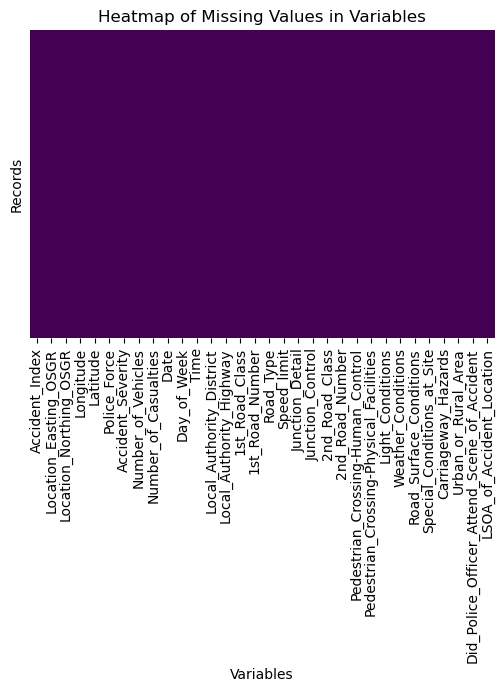

In [715]:
# Step 1: Check Missing Values by Percentage
print('Missing values per variable by percentage:')
missing_percentage = filtered_data.isna().sum().sort_values(ascending=False) / len(filtered_data)
print(missing_percentage)

# Step 2: Visualize Missing Values with a Heatmap
plt.figure(figsize=(6, 4), dpi=100)  # Adjusted size for better visibility
sns.heatmap(filtered_data.isna(), cmap='viridis', cbar=False, yticklabels=False, alpha=1)
plt.title('Heatmap of Missing Values in Variables')
plt.xlabel('Variables')
plt.ylabel('Records')
plt.show()

In [716]:
filtered_data.info()
filtered_data.head
filtered_data.describe

<class 'pandas.core.frame.DataFrame'>
Index: 1754 entries, 11735 to 144718
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               1754 non-null   string        
 1   Location_Easting_OSGR                        1754 non-null   int32         
 2   Location_Northing_OSGR                       1754 non-null   int32         
 3   Longitude                                    1754 non-null   float32       
 4   Latitude                                     1754 non-null   float32       
 5   Police_Force                                 1754 non-null   int64         
 6   Accident_Severity                            1754 non-null   category      
 7   Number_of_Vehicles                           1754 non-null   int8          
 8   Number_of_Casualties                         1754 non-null   int8          
 

<bound method NDFrame.describe of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
11735   200501MM71157                 533700                  170740   
12790   200501PY20007                 537120                  169810   
12791   200501PY20008                 538270                  165970   
12792   200501PY20009                 543110                  168750   
12793   200501PY20011                 541780                  159480   
...               ...                    ...                     ...   
138043  201001TD00005                 537590                  169530   
138085  201001TD00055                 541630                  159010   
138092  201001TD00066                 535580                  170120   
138105  201001TD00080                 537510                  170090   
144718  201001ZD30929                 533700                  170720   

        Longitude  Latitude  Police_Force Accident_Severity  \
11735       -0.08     51.42           

In [717]:
# Identify columns to check for outliers (numerical columns only)
numerical_cols = ['Number_of_Vehicles', 'Number_of_Casualties', 'Longitude', 'Latitude']

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply the function to each numerical column and print results
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(filtered_data, col)
    print(f"Outliers in '{col}':")
    print(outliers)
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Total Outliers: {len(outliers)}\n")

Outliers in 'Number_of_Vehicles':
       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
12795   200501PY20013                 542410                  165940   
12940   200501PY20189                 545180                  170610   
13022   200501PY20288                 534780                  169300   
13300   200501PY20622                 535920                  169760   
13360   200501PY20696                 540850                  171500   
13442   200501PY20807                 536680                  167700   
38948   200601PY20023                 535390                  170600   
39267   200601PY20412                 537530                  169560   
39270   200601PY20418                 535210                  169660   
39335   200601PY20495                 543710                  169850   
39354   200601PY20516                 534790                  169310   
39368   200601PY20531                 547190                  167270   
39641   200601PY29003         

In [718]:
g
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(data=filtered_data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

NameError: name 'g' is not defined

In [ ]:
# Highlight rows with extreme values
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(filtered_data, col)
    print(f"Extreme values in '{col}' (greater than {upper} or less than {lower}):")
    print(filtered_data.loc[outliers.index])

Extreme values in 'Number_of_Vehicles' (greater than 3.5 or less than -0.5):
       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
12795   200501PY20013                 542410                  165940   
12940   200501PY20189                 545180                  170610   
13022   200501PY20288                 534780                  169300   
13300   200501PY20622                 535920                  169760   
13360   200501PY20696                 540850                  171500   
13442   200501PY20807                 536680                  167700   
38948   200601PY20023                 535390                  170600   
39267   200601PY20412                 537530                  169560   
39270   200601PY20418                 535210                  169660   
39335   200601PY20495                 543710                  169850   
39354   200601PY20516                 534790                  169310   
39368   200601PY20531                 547190               

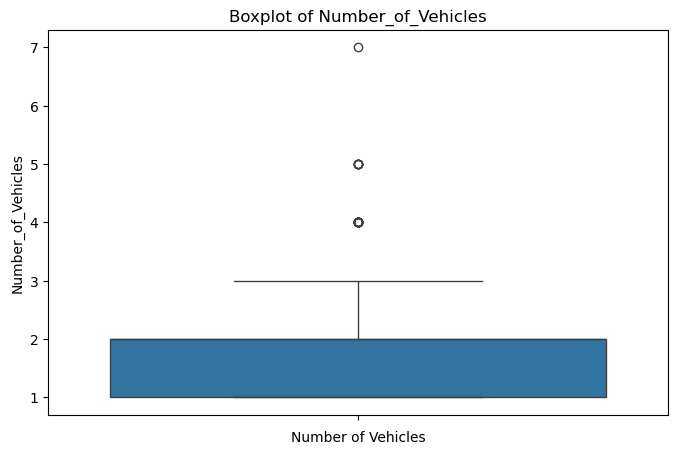

Detailed Information for Outliers:
       Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
count                  25.00                   25.00      25.00     25.00   
mean               539847.20               168614.40       0.01     51.40   
min                534330.00               161800.00      -0.07     51.34   
25%                535920.00               167700.00      -0.05     51.39   
50%                538180.00               169560.00      -0.01     51.41   
75%                543710.00               169920.00       0.06     51.41   
max                547290.00               171500.00       0.12     51.42   
std                  4450.01                 2327.62       0.06      0.02   

       Police_Force  Number_of_Vehicles  Number_of_Casualties  \
count         25.00               25.00                 25.00   
mean           0.00                4.32                  1.80   
min            0.00                4.00                  1.00   
25%        

In [ ]:
# Visualize the distribution of Number_of_Vehicles with outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data['Number_of_Vehicles'])
plt.title('Boxplot of Number_of_Vehicles')
plt.xlabel('Number of Vehicles')
plt.show()

# Focus on outliers for deeper analysis
outliers, _, _ = detect_outliers_iqr(filtered_data, 'Number_of_Vehicles')
print("Detailed Information for Outliers:")
print(outliers.describe())

In [ ]:
filtered_data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Time,Local_Authority_District,1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards
count,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754,1754,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00
mean,541263.98,167776.33,0.03,51.39,1.00,1.79,1.26,2007-11-03 03:14:34.344355584,2024-12-19 14:03:33.831243008,19.00,4.08,208.11,30.32,2.57,2.19,3.27,59.89,0.00,0.87,1.31,0.05,0.04
min,533700.00,156800.00,-0.08,51.29,1.00,1.00,1.00,2005-01-01 00:00:00,2024-12-19 00:01:00,19.00,1.00,0.00,20.00,0.00,-1.00,-1.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,537862.50,165912.50,-0.02,51.37,1.00,1.00,1.00,2006-05-02 00:00:00,2024-12-19 10:05:00,19.00,3.00,0.00,30.00,0.00,-1.00,-1.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,541200.00,168480.00,0.03,51.40,1.00,2.00,1.00,2007-10-11 12:00:00,2024-12-19 14:30:30,19.00,3.00,213.00,30.00,3.00,4.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,544690.00,169810.00,0.08,51.41,1.00,2.00,1.00,2009-05-10 00:00:00,2024-12-19 17:58:00,19.00,5.00,225.50,30.00,3.00,4.00,6.00,0.00,0.00,0.00,2.00,0.00,0.00
max,549840.00,173230.00,0.15,51.44,1.00,7.00,7.00,2010-12-11 00:00:00,2024-12-19 23:58:00,19.00,6.00,2212.00,70.00,9.00,4.00,6.00,2212.00,0.00,8.00,5.00,6.00,7.00
std,3997.20,2798.63,0.06,0.03,0.00,0.63,0.64,NaN,NaN,0.00,1.28,422.53,3.01,2.34,2.28,3.10,277.15,0.00,2.03,0.58,0.49,0.50


In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalize numeric features
scaler = StandardScaler()
numeric_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

filtered_data[numeric_columns] = scaler.fit_transform(filtered_data[numeric_columns])

print("\nNormalized Numeric Columns:")
print(filtered_data.describe())
filtered_data.head()


Normalized Numeric Columns:
       Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
count                1754.00                 1754.00    1754.00   1754.00   
mean               541263.98               167776.33       0.03     51.39   
min                533700.00               156800.00      -0.08     51.29   
25%                537862.50               165912.50      -0.02     51.37   
50%                541200.00               168480.00       0.03     51.40   
75%                544690.00               169810.00       0.08     51.41   
max                549840.00               173230.00       0.15     51.44   
std                  3997.20                 2798.63       0.06      0.03   

       Police_Force  Number_of_Vehicles  Number_of_Casualties  \
count       1754.00             1754.00               1754.00   
mean           0.00                1.79                  1.26   
min            0.00                1.00                  1.00   
25%            0.

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
11735,200501MM71157,533700,170740,-0.08,51.42,0.00,3,2,1,2005-03-11,5,2024-12-19 14:24:00,0.00,E09000006,-0.85,0.01,1,30,-0.67,0.79,-0.09,0.56,0.00,0.06,1,1,-0.53,-0.10,-0.08,1,1,E01003062
12790,200501PY20007,537120,169810,-0.03,51.41,0.00,3,1,1,2005-01-01,7,2024-12-19 00:19:00,0.00,E09000006,-0.85,4.28,6,30,-1.10,-1.40,-1.38,-0.22,0.00,-0.43,4,1,1.19,-0.10,-0.08,1,1,E01000714
12791,200501PY20008,538270,165970,-0.01,51.38,0.00,3,1,1,2005-01-01,7,2024-12-19 03:16:00,0.00,E09000006,-0.85,0.01,6,30,1.47,-0.08,-0.09,0.62,0.00,2.04,4,1,1.19,-0.10,-0.08,1,1,E01000835
12792,200501PY20009,543110,168750,0.06,51.40,0.00,3,1,1,2005-02-01,1,2024-12-19 21:06:00,0.00,E09000006,1.50,-0.49,6,30,-1.10,-1.40,-1.38,-0.22,0.00,3.52,4,1,1.19,-0.10,-0.08,1,1,E01000649
12793,200501PY20011,541780,159480,0.03,51.32,0.00,3,1,1,2005-03-01,2,2024-12-19 18:00:00,0.00,E09000006,0.72,-0.49,6,30,-1.10,-1.40,-1.38,-0.22,0.00,-0.43,4,2,4.65,-0.10,-0.08,1,3,E01000658



Correlation Analysis:


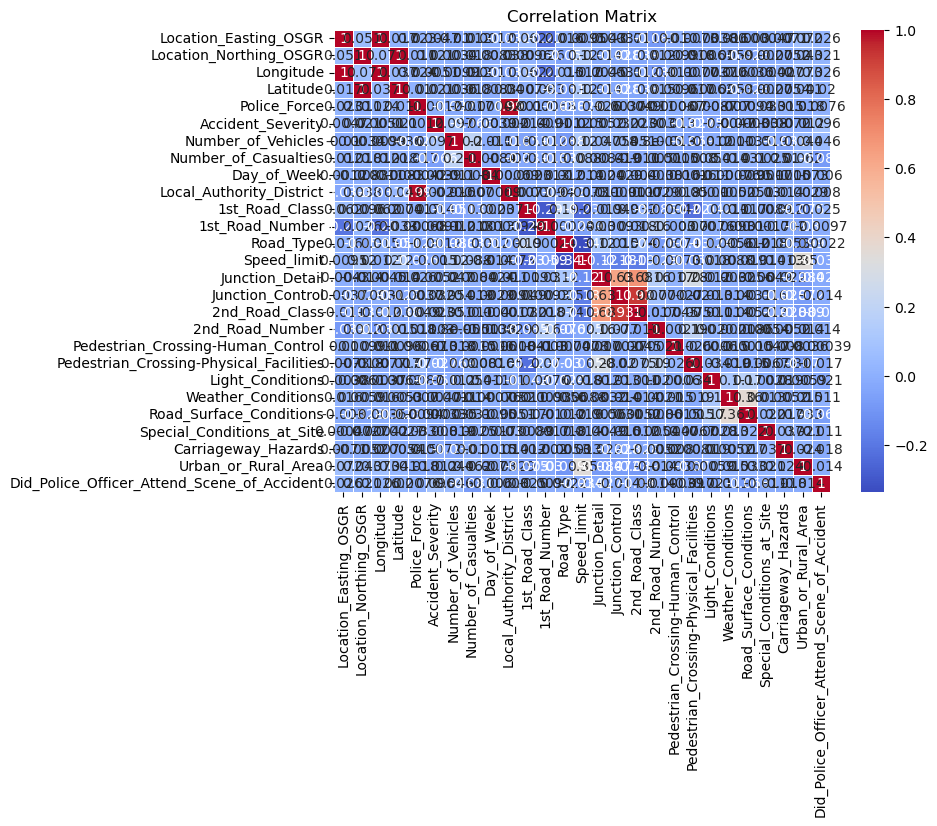

In [ ]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

print("\nCorrelation Analysis:")
correlation_matrix = my_data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = filtered_data.drop(columns=['Accident_Index', 'Longitude', 'Latitude'], errors='ignore')
y = filtered_data['Accident_Severity']

# Split into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")
print(f"Validation Set Shape: {X_val.shape}")

Training Set Shape: (1227, 29)
Testing Set Shape: (263, 29)
Validation Set Shape: (264, 29)


Modeling

K-means Cluster

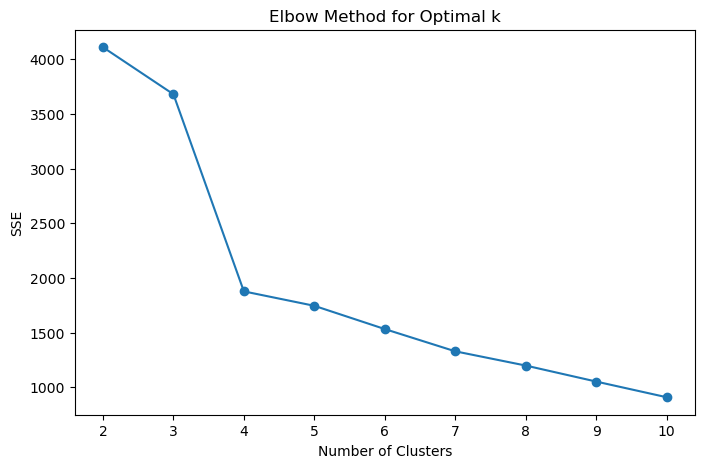

Silhouette Score for 3 Clusters: 0.47


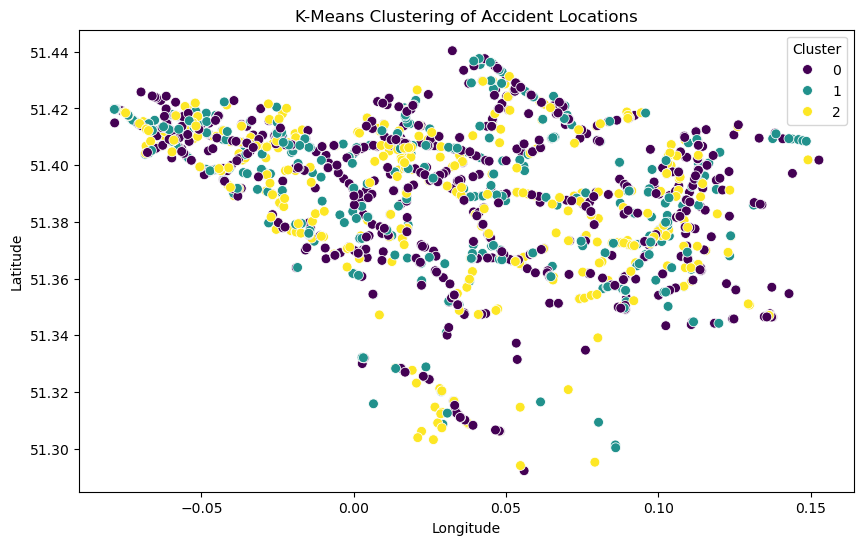

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
clustering_features = filtered_data[['Weather_Conditions', 'Light_Conditions', 'Number_of_Vehicles', 'Number_of_Casualties']]

# Apply K-Means Clustering
k_values = range(2, 11)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    sse.append(kmeans.inertia_)

# Plot SSE to find the optimal number of clusters (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means with the chosen number of clusters
optimal_k = 3  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(clustering_features)

# Silhouette Score
silhouette_avg = silhouette_score(clustering_features, filtered_data['Cluster'])
print(f"Silhouette Score for {optimal_k} Clusters: {silhouette_avg:.2f}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=filtered_data, palette='viridis', s=50)
plt.title('K-Means Clustering of Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Verify target variable
print("y_train type:", y_train.dtype)
print("Unique values in y_train:", y_train.unique())
print("Check for missing values in y_train:", y_train.isnull().sum())

# If target variable is numeric but treated as continuous, convert to integers
y_train = y_train.astype('int')  # Convert to integers if necessary
y_test = y_test.astype('int')

# Convert to categorical explicitly
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Final check
print("Final y_train type:", y_train.dtype)
print("Unique values in y_train after conversion:", y_train.unique())

y_train type: category
Unique values in y_train: [3, 2, 1]
Categories (3, int64): [1, 2, 3]
Check for missing values in y_train: 0
Final y_train type: category
Unique values in y_train after conversion: [3, 2, 1]
Categories (3, int64): [1, 2, 3]


In [ ]:
# Ensure X_train and X_test have only numeric columns
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

# Check for missing values in X_train
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Drop any rows with missing target values
X_train = X_train.loc[~y_train.isnull()]
y_train = y_train.loc[~y_train.isnull()]

# Verify shapes are aligned
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Missing values in X_train:
Police_Force                               0
Local_Authority_District                   0
1st_Road_Class                             0
1st_Road_Number                            0
Junction_Detail                            0
Junction_Control                           0
2nd_Road_Class                             0
2nd_Road_Number                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
dtype: int64
Shape of X_train: (1227, 13)
Shape of y_train: (1227,)


Accuracy Score: 0.8288973384030418

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.15      0.11      0.12        28
           3       0.89      0.93      0.91       231

    accuracy                           0.83       263
   macro avg       0.35      0.35      0.34       263
weighted avg       0.80      0.83      0.81       263



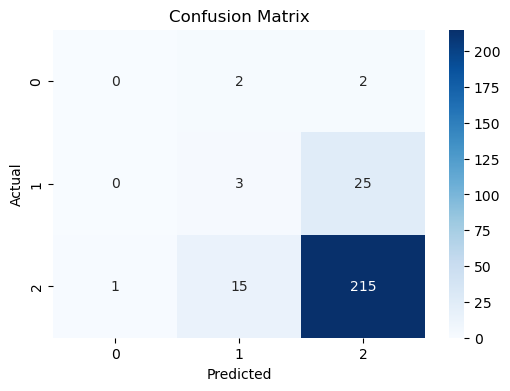

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

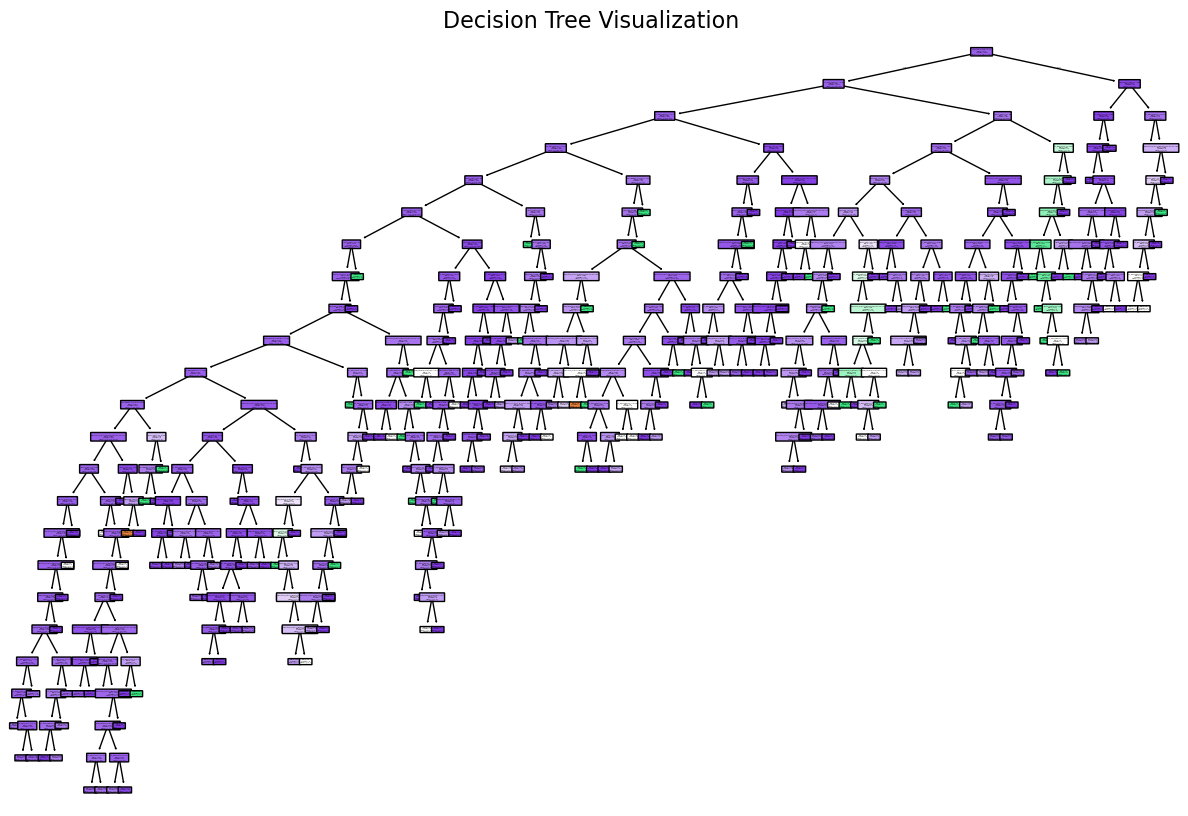

In [ ]:
# Import the necessary function
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=y_train.unique().astype(str), filled=True, rounded=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                                    Feature  Importance
3                           1st_Road_Number        0.23
4                           Junction_Detail        0.22
10                  Road_Surface_Conditions        0.11
7                           2nd_Road_Number        0.10
9   Pedestrian_Crossing-Physical_Facilities        0.10
6                            2nd_Road_Class        0.08
5                          Junction_Control        0.07
2                            1st_Road_Class        0.05
12                      Carriageway_Hazards        0.03
11               Special_Conditions_at_Site        0.02
0                              Police_Force        0.00
1                  Local_Authority_District        0.00
8         Pedestrian_Crossing-Human_Control        0.00


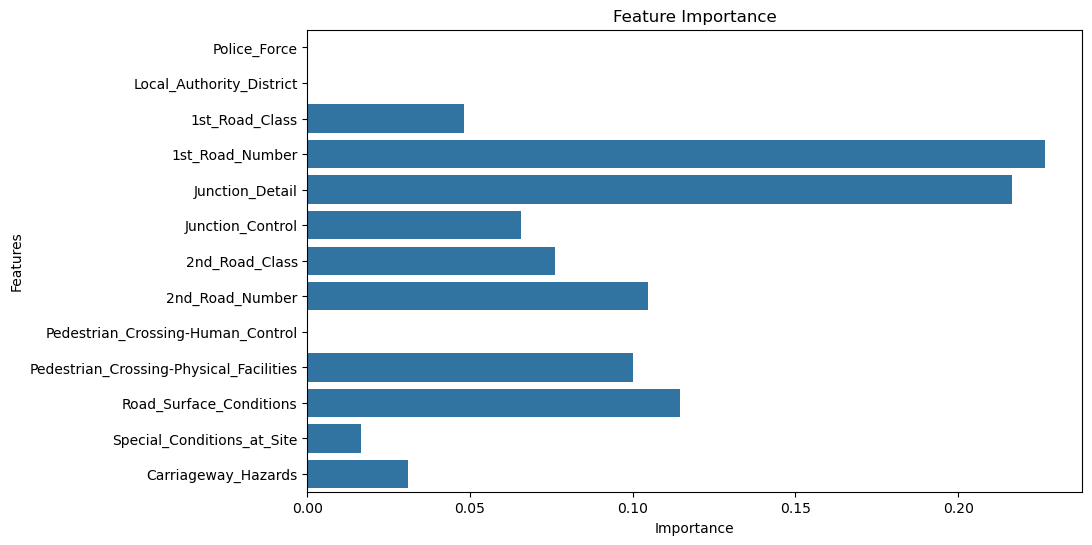

In [ ]:
# Plot feature importance
importances = dt_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


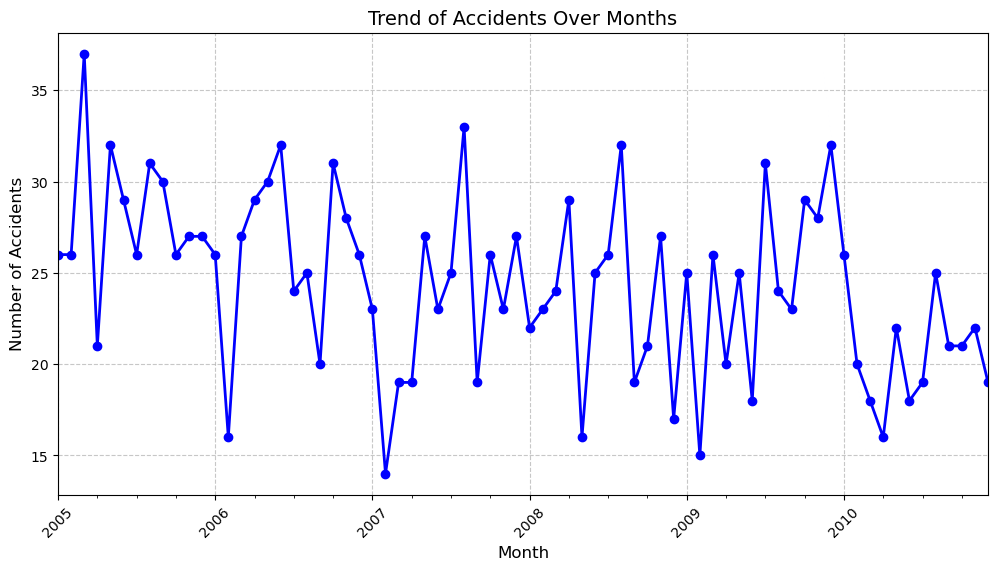

In [ ]:
# Convert 'Date' to datetime format (if not already done)
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], errors='coerce')

# Extract the month from the 'Date' column
filtered_data['Month'] = filtered_data['Date'].dt.to_period('M')

# Count accidents by month
accidents_by_month = filtered_data['Month'].value_counts().sort_index()

# Plot the trend by month
plt.figure(figsize=(12, 6))
accidents_by_month.plot(kind='line', color='blue', linewidth=2, marker='o')  # Changed color to blue
plt.title('Trend of Accidents Over Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1437686069.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


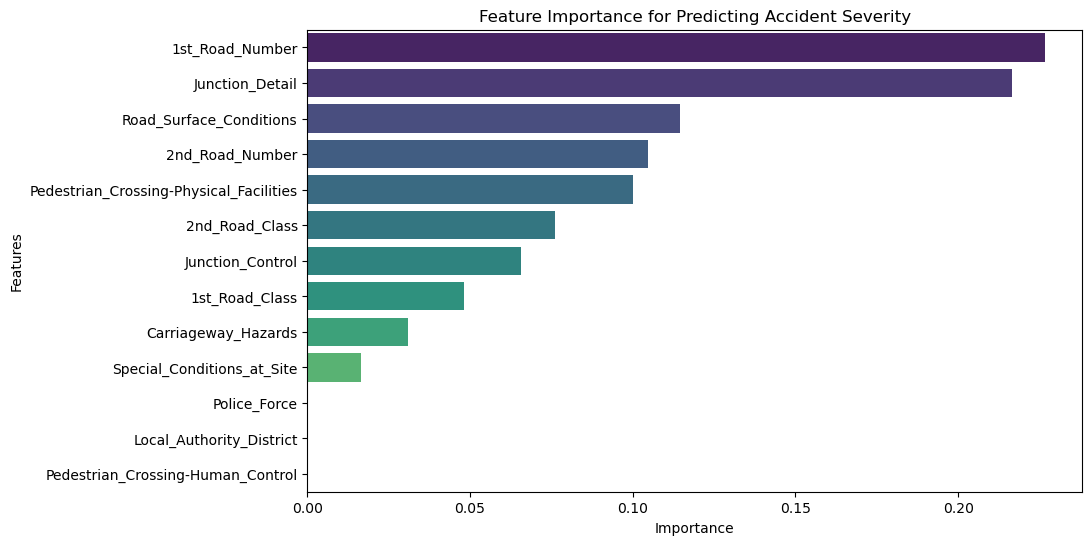

In [ ]:
# Feature Importance Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance and corresponding feature names
feature_importances = dt_model.feature_importances_
features = X_train.columns

# Create a DataFrame for sorting and visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Accident Severity")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
# Check if 'Time' column exists
print(filtered_data.columns)

# Check the first few rows of the 'Time' column
print(filtered_data['Time'].head())

# Verify data type of 'Time' column
print(filtered_data['Time'].dtypes)

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_District', 'Local_Authority_Highway',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Cluster', 'Month'],
      dtype='object')
11735   2024-12-19 14:24:00
12790   2024-12-19 00:19:00
12791   2024-12-19 03:16:00
12792   2024-12-19 21:06:00
12793   2024-12-19 18:00:00
Name: Time, dtype: datetime6

In [ ]:
# Convert 'Time' to datetime format (if not already done)
filtered_data['Time'] = pd.to_datetime(filtered_data['Time'], errors='coerce')

# Drop rows with invalid or NaT (not a timestamp) entries
filtered_data = filtered_data.dropna(subset=['Time'])

# Extract the hour from the 'Time' column
filtered_data['Hour'] = filtered_data['Time'].dt.hour

# Verify the 'Hour' column
print(filtered_data[['Time', 'Hour']].head())

                     Time  Hour
11735 2024-12-19 14:24:00    14
12790 2024-12-19 00:19:00     0
12791 2024-12-19 03:16:00     3
12792 2024-12-19 21:06:00    21
12793 2024-12-19 18:00:00    18


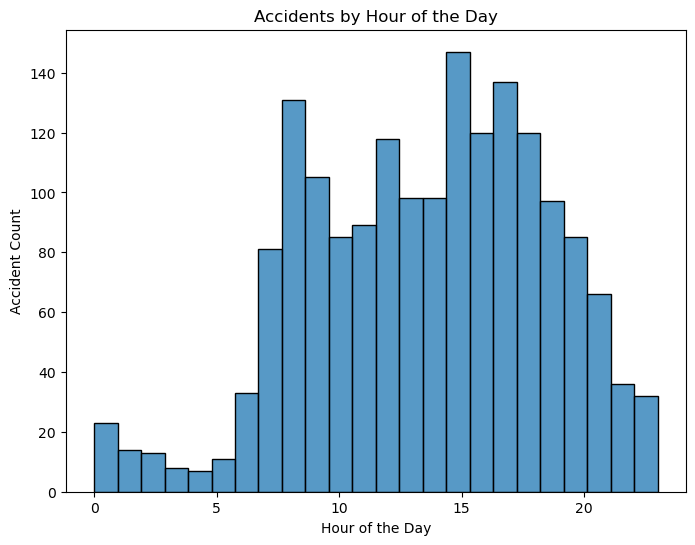

In [ ]:
# Analyze accidents by time of day
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Hour'], bins=24, kde=False)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.show()

/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/3231463952.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=police_involvement.index, y=police_involvement.values, palette='viridis')


Unique values in 'Did_Police_Officer_Attend_Scene_of_Accident':
[1, 3, 2]
Categories (3, int64): [1, 2, 3]

Counts of Police Involvement:
Did_Police_Officer_Attend_Scene_of_Accident
1    1451
2     297
3       6
Name: count, dtype: int64


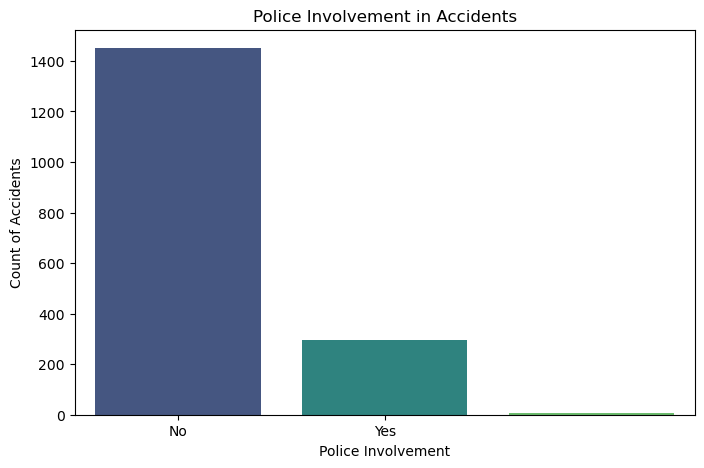

In [ ]:
# Step 1: Inspect the relevant column
print("Unique values in 'Did_Police_Officer_Attend_Scene_of_Accident':")
print(filtered_data['Did_Police_Officer_Attend_Scene_of_Accident'].unique())

# Step 2: Count occurrences of police involvement
police_involvement = filtered_data['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

# Step 3: Display the results
print("\nCounts of Police Involvement:")
print(police_involvement)

# Step 4: Visualize police involvement in accidents
plt.figure(figsize=(8, 5))
sns.barplot(x=police_involvement.index, y=police_involvement.values, palette='viridis')
plt.title('Police Involvement in Accidents')
plt.xlabel('Police Involvement')
plt.ylabel('Count of Accidents')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Accident Severity by Weather Conditions:
 Accident_Severity    1    2     3
Weather_Conditions               
1                   12  207  1231
2                    1   27   183
3                    0    3    15
4                    0    4    10
5                    1    4    14
7                    0    0     6
8                    0    5    22
9                    0    3     6


/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/2695615014.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_weather = filtered_data.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()


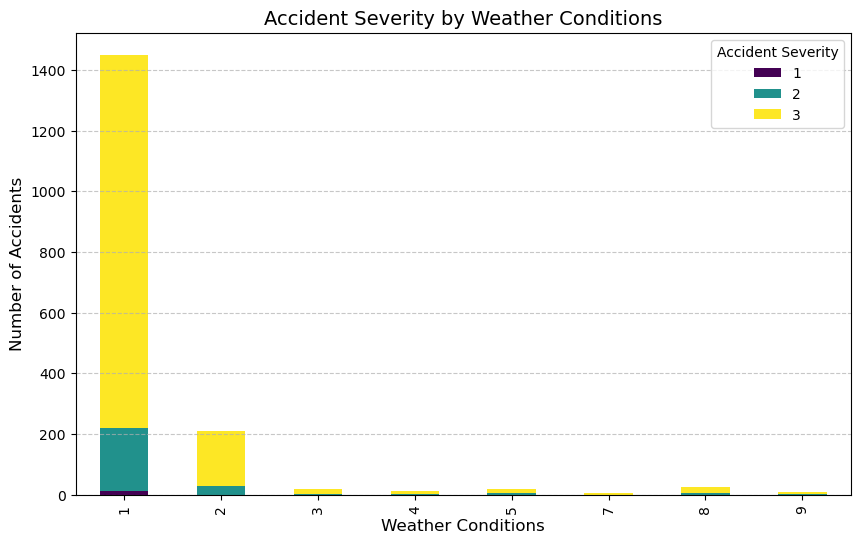

In [ ]:
# Group by weather conditions and severity
severity_weather = filtered_data.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
print("Accident Severity by Weather Conditions:\n", severity_weather)

# Plot the relationship
severity_weather.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Accident Severity by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Accident Severity')
plt.show()

Accident Trends by Hour:
 Hour
0      23
1      14
2      13
3       8
4       7
5      11
6      33
7      81
8     131
9     105
10     85
11     89
12    118
13     98
14     98
15    147
16    120
17    137
18    120
19     97
20     85
21     66
22     36
23     32
Name: count, dtype: int64


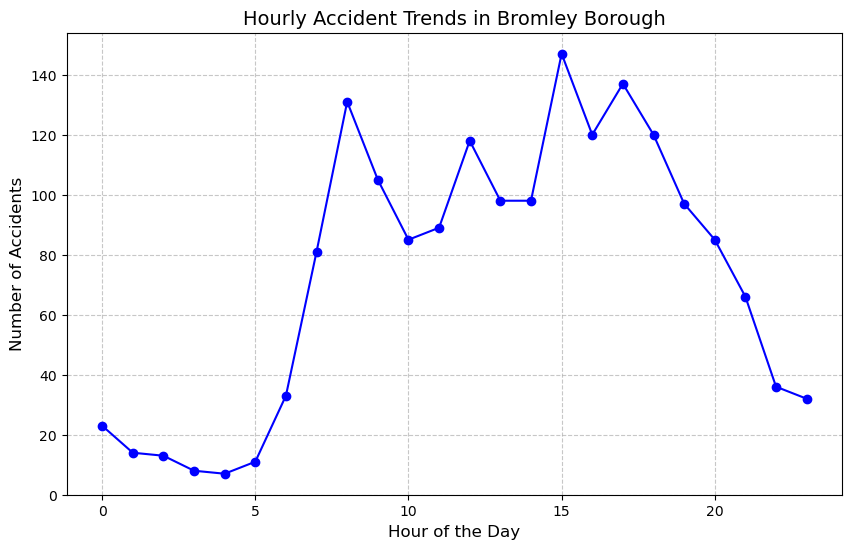

In [ ]:
# Convert Time column to datetime format
filtered_data['Time'] = pd.to_datetime(filtered_data['Time'], errors='coerce')
filtered_data['Hour'] = filtered_data['Time'].dt.hour

# Count hourly accidents
hourly_accidents = filtered_data['Hour'].value_counts().sort_index()
print("Accident Trends by Hour:\n", hourly_accidents)

# Plot Hourly Trends
plt.figure(figsize=(10, 6))
hourly_accidents.plot(kind='line', marker='o', color='blue')
plt.title('Hourly Accident Trends in Bromley Borough', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1099684011.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  filtered_data['Accident_Severity'] = filtered_data['Accident_Severity'].replace(severity_mapping)
/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1099684011.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_Severity', data=filtered_data, palette='muted')


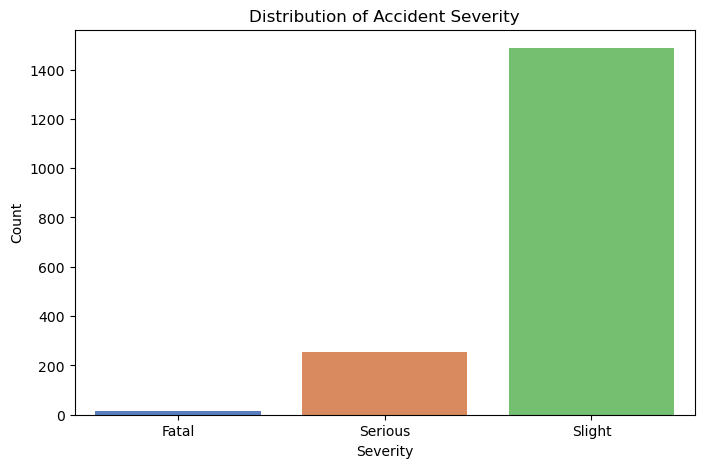

In [ ]:
# Create a mapping dictionary for Accident_Severity
severity_mapping = {
    1: "Fatal",
    2: "Serious",
    3: "Slight"
}

# Replace Accident_Severity codes with descriptive labels
filtered_data['Accident_Severity'] = filtered_data['Accident_Severity'].replace(severity_mapping)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=filtered_data, palette='muted')
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/1039424041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=filtered_data, palette='pastel', order=sorted(filtered_data['Day_of_Week'].unique()))


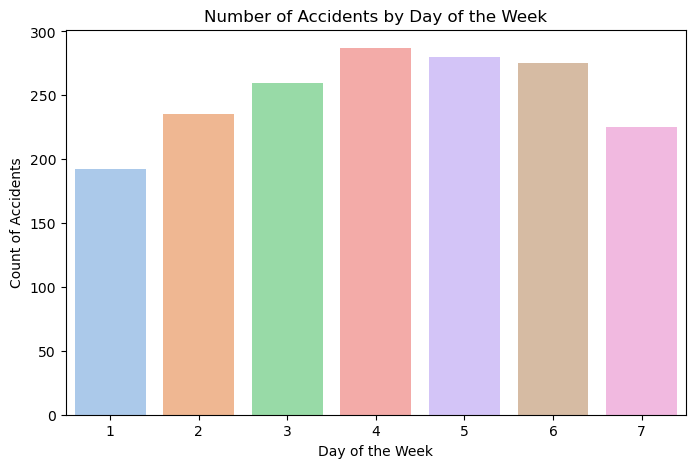

In [ ]:
# Plot accidents by day of the week
plt.figure(figsize=(8, 5))
sns.countplot(x='Day_of_Week', data=filtered_data, palette='pastel', order=sorted(filtered_data['Day_of_Week'].unique()))
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count of Accidents")
plt.show()

/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/943352183.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  filtered_data['Road_Type'] = filtered_data['Road_Type'].replace(road_type_mapping)
/var/folders/qn/m98g77d56n96x1dgxk4hwsq80000gn/T/ipykernel_73517/943352183.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_Type', data=filtered_data, palette='Set2', order=filtered_data['Road_Type'].value_counts().index)


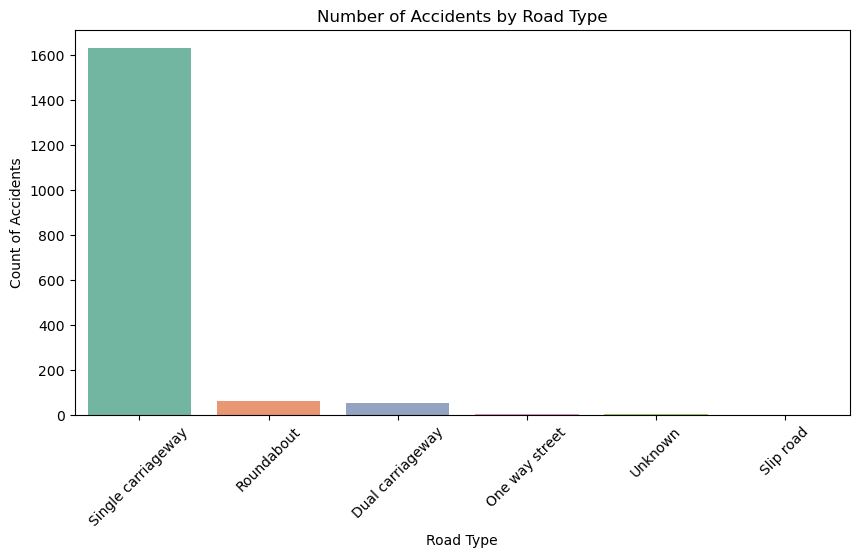

In [ ]:
# Create a mapping dictionary for Road_Type
road_type_mapping = {
    1: "Roundabout",
    2: "One way street",
    3: "Dual carriageway",
    6: "Single carriageway",
    7: "Slip road",
    9: "Unknown",
    12: "Straight road",
    15: "Other"  # Example descriptive names
}

# Replace the Road_Type codes with clean names
filtered_data['Road_Type'] = filtered_data['Road_Type'].replace(road_type_mapping)

# Plot accidents by updated Road Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Road_Type', data=filtered_data, palette='Set2', order=filtered_data['Road_Type'].value_counts().index)
plt.title("Number of Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count of Accidents")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Prepare data for the heatmap
accident_data = filtered_data[['Latitude', 'Longitude']].dropna()

# Initialize a folium map centered around London
london_map = folium.Map(location=[filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()], zoom_start=10)

# Add heatmap layer
HeatMap(accident_data.values, radius=8, max_zoom=10).add_to(london_map)

# Save and display the map
london_map.save("accident_heatmap.html")
london_map